## Data Anaylsis of S&P500 Index

#### Pre-requisites (ALWAYS RUN THESE CELLS)

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from typing import Literal

Importing Data

In [2]:
ticker_data = pd.read_excel('S&P500data.xlsx')
ticker_data.columns = list(ticker_data.iloc[0,:])

In [3]:
df = ticker_data.drop(labels=0,axis=0)

In [4]:
df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters,Founded
1,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,"Santa Clara, California",1999
2,AAL,American Airlines Group,Industrials,Passenger Airlines,"Fort Worth, Texas",1934
3,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1977
4,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2013 (1888)
5,ABNB,Airbnb,Consumer Discretionary,"Hotels, Resorts & Cruise Lines","San Francisco, California",2008
...,...,...,...,...,...,...
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",1927
501,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",1969
502,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",1873


In [2]:
def getSymbolData(df:pd.DataFrame, sym:str, info_type:Literal['Overall','Balance Sheet',''] = 'Overall') -> any:
    """
    Get required data for the desired symbol.
    df: Excel Data
    sym: Symbol
    info_type: The type of information required. One among: ['Overall','Balance Sheet'], default = 'Overall'
    """
    record = df[df['Symbol']==sym]
    ticker = yf.Ticker(sym)

    return record

In [2]:
def display_data(df:pd.DataFrame, is_detailed:bool = False) -> None:
    """
    Displays data as required
    df: Pandas DataFrame to be displayed
    is_detailed: Boolean value whether to generate a detailed display, default = False 
    """
    if is_detailed:
            pd.set_option('display.max_rows', None)
            pd.set_option('display.max_columns', None)
            pd.set_option('display.width', None)
            pd.set_option('display.max_colwidth', None)
            display(df)
            pd.reset_option('all')
    else:
        display(df)
    return

#### Data Analysis

In [24]:
ticker = yf.Ticker('AAPL')
b = ticker.get_balance_sheet()
a = ticker.get_info()
print(a['debtToEquity'])
print(np.array(b.loc['TotalDebt'])/np.array(b.loc['StockholdersEquity']))

145.803
[1.7875325845589418 2.3695334701610355 1.9768426058012363
 1.720809929750991]


In [10]:
ticker.info['marketCap']

2719009734656

In [12]:
display_data(ticker.get_income_stmt(),True)

,2023-09-30,2022-09-30,2021-09-30,2020-09-30
TaxEffectOfUnusualItems,0.0,0.0,0.0,0.0
TaxRateForCalcs,0.147,0.162,0.133,0.144
NormalizedEBITDA,129188000000.0,133138000000.0,123136000000.0,81020000000.0
NetIncomeFromContinuingOperationNetMinorityInterest,96995000000.0,99803000000.0,94680000000.0,57411000000.0
ReconciledDepreciation,11519000000.0,11104000000.0,11284000000.0,11056000000.0
ReconciledCostOfRevenue,214137000000.0,223546000000.0,212981000000.0,169559000000.0
EBITDA,129188000000.0,133138000000.0,123136000000.0,81020000000.0
EBIT,117669000000.0,122034000000.0,111852000000.0,69964000000.0
NetInterestIncome,-183000000.0,-106000000.0,198000000.0,890000000.0
InterestExpense,3933000000.0,2931000000.0,2645000000.0,2873000000.0


C:\Users\Hrriday\AppData\Local\Temp\ipykernel_21268\4093611274.py:13: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [23]:
display_data(ticker.actions,True)

,Dividends,Stock Splits
Date,,
1987-05-11 00:00:00-04:00,0.000536,0.0
1987-06-16 00:00:00-04:00,0.000000,2.0
1987-08-10 00:00:00-04:00,0.000536,0.0
1987-11-17 00:00:00-05:00,0.000714,0.0
1988-02-12 00:00:00-05:00,0.000714,0.0
1988-05-16 00:00:00-04:00,0.000714,0.0
1988-08-15 00:00:00-04:00,0.000714,0.0
1988-11-21 00:00:00-05:00,0.000893,0.0
1989-02-17 00:00:00-05:00,0.000893,0.0


C:\Users\Hrriday\AppData\Local\Temp\ipykernel_7772\4093611274.py:13: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [4]:
ticker.financials
sel_fields = ['EBITDA','EBIT','InterestExpense','InterestIncome','TotalExpenses','NetIncome','TotalRevenue','GrossProfit','BasicEPS','ResearchAndDevelopment']

In [12]:
display_data(ticker.get_incomestmt(),True)

,2022-12-31,2021-12-31,2020-12-31
TaxEffectOfUnusualItems,-3415860000.0,1839997169.143666,287626230.457441
TaxRateForCalcs,0.21,0.12558,0.118413
NormalizedEBITDA,54618000000.0,59741000000.0,48647000000.0
TotalUnusualItems,-16266000000.0,14652000000.0,2429000000.0
TotalUnusualItemsExcludingGoodwill,-16266000000.0,14652000000.0,2429000000.0
NetIncomeFromContinuingOperationNetMinorityInterest,-2722000000.0,33364000000.0,21331000000.0
ReconciledDepreciation,41921000000.0,34433000000.0,25251000000.0
ReconciledCostOfRevenue,446343000000.0,403507000000.0,334564000000.0
EBITDA,38352000000.0,74393000000.0,51076000000.0
EBIT,-3569000000.0,39960000000.0,25825000000.0


C:\Users\Hrriday\AppData\Local\Temp\ipykernel_10296\4093611274.py:13: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


,Holder,Shares,Date Reported,% Out,Value,Ratio
0,Vanguard Group Inc,1299997133,2023-09-29,0.0841,250145445951,192.419998
1,Blackrock Inc.,1031407553,2023-09-29,0.0667,198463439459,192.419998
2,"Berkshire Hathaway, Inc",915560382,2023-09-29,0.0592,176172127027,192.419998
3,State Street Corporation,569291690,2023-09-29,0.0368,109543105947,192.419998
4,"FMR, LLC",298321726,2023-09-29,0.0193,57403065970,192.419998
5,"Geode Capital Management, LLC",296103070,2023-09-29,0.0192,56976152187,192.419998
6,Price (T.Rowe) Associates Inc,216307878,2023-09-29,0.0140,41621961488,192.419998
7,Morgan Stanley,206732960,2023-09-29,0.0134,39779555784,192.419998
8,Northern Trust Corporation,168874976,2023-09-29,0.0109,32494922572,192.419998
9,Norges Bank Investment Management,167374278,2022-12-30,0.0108,32206158266,192.419998


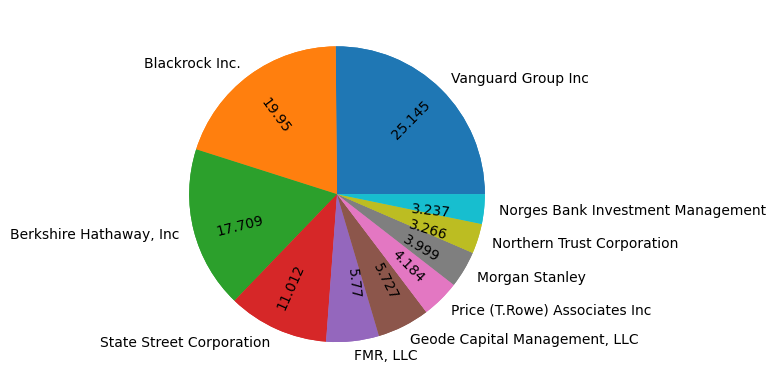

In [32]:
dfN = ticker.get_institutional_holders()
display(dfN)
plt.pie(dfN['Shares'],normalize=True,labels=dfN['Holder'])
plt.pie(dfN['Shares'],normalize=True,labels=round((dfN['Shares']/dfN['Shares'].sum())*100,3),labeldistance=0.5,rotatelabels=True)
plt.show()

In [34]:
dfN = ticker.get_major_holders()
display(dfN)

,0,1
0,0.07%,% of Shares Held by All Insider
1,61.84%,% of Shares Held by Institutions
2,61.89%,% of Float Held by Institutions
3,5913,Number of Institutions Holding Shares


,Holder,Shares,Date Reported,% Out,Value
0,Vanguard Total Stock Market Index Fund,462496298,2023-09-29,0.0299,88993536814
1,Vanguard 500 Index Fund,353157634,2023-09-29,0.0228,67954591287
2,Fidelity 500 Index Fund,171251755,2023-11-29,0.0111,32952262383
3,SPDR S&P 500 ETF Trust,166683962,2023-11-29,0.0108,32073327662
4,iShares Core S&P 500 ETF,144835227,2023-11-29,0.0094,27869194114
5,Vanguard Growth Index Fund,128896004,2023-09-29,0.0083,24802168853
6,"Invesco ETF Tr-Invesco QQQ Tr, Series 1 ETF",126707529,2023-11-29,0.0082,24381062498
7,Vanguard Institutional Index Fund-Institutiona...,98610773,2023-09-29,0.0064,18974684760
8,Vanguard Information Technology Index Fund,76972129,2023-08-30,0.0050,14810976921
9,Select Sector SPDR Fund-Technology,66511398,2023-11-29,0.0043,12798123081


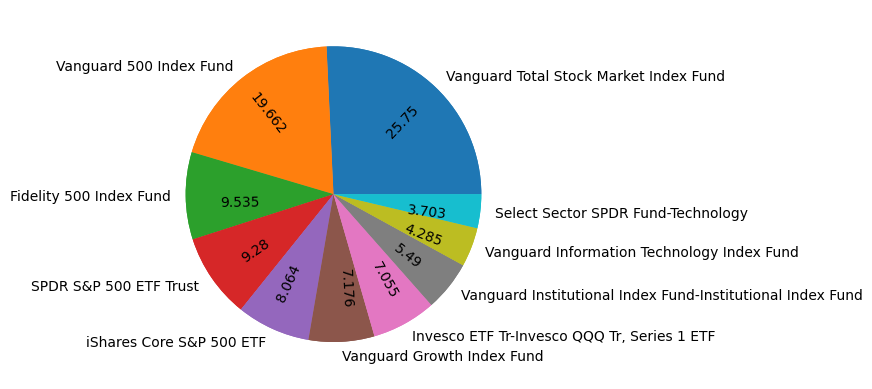

In [35]:
dfN = ticker.get_mutualfund_holders()
display(dfN)
plt.pie(dfN['Shares'],normalize=True,labels=dfN['Holder'])
plt.pie(dfN['Shares'],normalize=True,labels=round((dfN['Shares']/dfN['Shares'].sum())*100,3),labeldistance=0.5,rotatelabels=True)
plt.show()

In [8]:
ticker = yf.Ticker('NVDA')
data = ticker.quarterly_balancesheet
display_data(data,True)
#Date = 2023-09-30, 2023-12-31
display_data(ticker.quarterly_financials)
display_data(ticker.balance_sheet, True)

,2023-10-31,2023-07-31,2023-04-30,2023-01-31
Treasury Shares Number,0.0,NaN,NaN,NaN
Ordinary Shares Number,2466000000.0,2469000000.0,2473000000.0,2466136572.0
Share Issued,2466000000.0,2469000000.0,2473000000.0,2466136572.0
Net Debt,4187000000.0,3922000000.0,5875000000.0,7564000000.0
Total Debt,11027000000.0,10954000000.0,12080000000.0,12031000000.0
Tangible Book Value,27584000000.0,21676000000.0,18549000000.0,16053000000.0
Invested Capital,42971000000.0,37206000000.0,35474000000.0,33054000000.0
Working Capital,23557000000.0,18463000000.0,17623000000.0,16510000000.0
Net Tangible Assets,27584000000.0,21676000000.0,18549000000.0,16053000000.0
Capital Lease Obligations,1321000000.0,1249000000.0,1126000000.0,1078000000.0


C:\Users\Hrriday\AppData\Local\Temp\ipykernel_15524\4093611274.py:13: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


,2023-10-31,2023-07-31,2023-04-30,2023-01-31
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0
Tax Rate For Calcs,0.122,0.114,0.075,0.21
Normalized EBITDA,10957000000.0,7411000000.0,2659000000.0,1778000000.0
Total Unusual Items,0.0,0.0,0.0,0.0
Total Unusual Items Excluding Goodwill,0.0,0.0,0.0,0.0
Net Income From Continuing Operation Net Minority Interest,9243000000.0,6188000000.0,2043000000.0,1414000000.0
Reconciled Depreciation,372000000.0,365000000.0,384000000.0,426000000.0
Reconciled Cost Of Revenue,4720000000.0,4045000000.0,2544000000.0,2218000000.0
EBITDA,10957000000.0,7411000000.0,2659000000.0,1778000000.0
EBIT,10585000000.0,7046000000.0,2275000000.0,1352000000.0


,2023-01-31,2022-01-31,2021-01-31
Treasury Shares Number,NaN,NaN,1380000000.0
Ordinary Shares Number,2466136572.0,2506000000.0,2480000000.0
Share Issued,2466136572.0,2506000000.0,3860000000.0
Net Debt,7564000000.0,8956000000.0,6116000000.0
Total Debt,12031000000.0,11831000000.0,7597000000.0
Tangible Book Value,16053000000.0,19924000000.0,9963000000.0
Invested Capital,33054000000.0,37558000000.0,23856000000.0
Working Capital,16510000000.0,24494000000.0,12130000000.0
Net Tangible Assets,16053000000.0,19924000000.0,9963000000.0
Capital Lease Obligations,1078000000.0,885000000.0,634000000.0


C:\Users\Hrriday\AppData\Local\Temp\ipykernel_15524\4093611274.py:13: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [9]:
a = ticker.get_info()
display_data(a,True)
print(a['currentRatio'],a['quickRatio'], a['enterpriseValue'])
print(a['enterpriseValue']>0)
sel_fields = ['bookValue','currentRatio','debtToEquity','dividendRate','dividendYield','fiveYearAvgDividendYield','earningsGrowth','earningsQuarterlyGrowth','enterpriseToEbitda','enterpriseToRevenue','enterpriseValue','payoutRatio','marketCap','priceToBook','quickRatio','profitMargins','returnOnAssets','returnOnEquity','revenueGrowth','revenuePerShare','totalRevenue','totalDebt','totalCash','totalCashPerShare']

{'address1': '2788 San Tomas Expressway',
 'city': 'Santa Clara',
 'state': 'CA',
 'zip': '95051',
 'country': 'United States',
 'phone': '408 486 2000',
 'website': 'https://www.nvidia.com',
 'industry': 'Semiconductors',
 'industryKey': 'semiconductors',
 'industryDisp': 'Semiconductors',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': "NVIDIA Corporation provides graphics, and compute and networking solutions in the United States, Taiwan, China, and internationally. The company's Graphics segment offers GeForce GPUs for gaming and PCs, the GeForce NOW game streaming service and related infrastructure, and solutions for gaming platforms; Quadro/NVIDIA RTX GPUs for enterprise workstation graphics; vGPU software for cloud-based visual and virtual computing; automotive platforms for infotainment systems; and Omniverse software for building 3D designs and virtual worlds. Its Compute & Networking segment provides Data Center platfo

3.588 2.922 1786287095808
True


C:\Users\Hrriday\AppData\Local\Temp\ipykernel_15524\4093611274.py:13: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [28]:
yf.download('RELIANCE.NS',period='max',interval='1mo')

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,15.859429,16.783918,11.763055,13.673923,8.969458,3587399513
1996-02-01,13.538537,18.950085,13.499856,16.389366,10.750660,6910292355
1996-03-01,16.517015,18.412411,14.892391,16.002550,10.496929,5434431895
1996-04-01,16.072178,20.307806,15.936792,18.926874,12.415150,4130762758
1996-05-01,20.655939,20.880293,17.449242,18.439487,12.095446,5496793040
...,...,...,...,...,...,...
2023-10-01,2345.000000,2367.000000,2220.300049,2287.899902,2287.899902,102836679
2023-11-01,2289.149902,2411.949951,2275.199951,2377.449951,2377.449951,102857480
2023-12-01,2378.000000,2614.000000,2377.600098,2584.949951,2584.949951,127731315


In [17]:
recession = pd.read_csv("GDP Based Recession Indicator.csv")
inflation = pd.read_csv("Inflation.csv")

In [18]:
display(recession)
display(inflation)

,DATE,JHGDPBRINDX
0,1967-10-01,3.8348
1,1968-01-01,1.7614
2,1968-04-01,1.2127
3,1968-07-01,2.3009
4,1968-10-01,6.3338
...,...,...
219,2022-07-01,8.3000
220,2022-10-01,7.6000
221,2023-01-01,4.9000
222,2023-04-01,3.0000


,DATE,T10YIE
0,2003-01-02,1.64
1,2003-01-03,1.62
2,2003-01-06,1.63
3,2003-01-07,1.62
4,2003-01-08,1.71
...,...,...
5525,2024-03-07,2.28
5526,2024-03-08,2.28
5527,2024-03-11,2.27
5528,2024-03-12,2.3


In [34]:
mask = inflation['T10YIE'] == '.'
new_inflation = inflation[~mask]
new_inflation['T10YIE'] = pd.Series(new_inflation['T10YIE'], dtype=float)

C:\Users\Hrriday\AppData\Local\Temp\ipykernel_8368\2497970699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_inflation['T10YIE'] = pd.Series(new_inflation['T10YIE'], dtype=float)


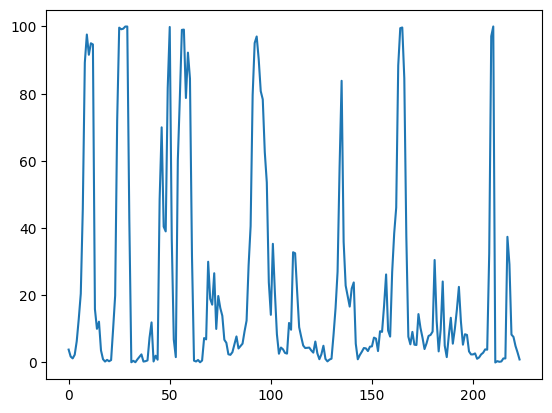

In [7]:
plt.plot(recession.iloc[:,1])

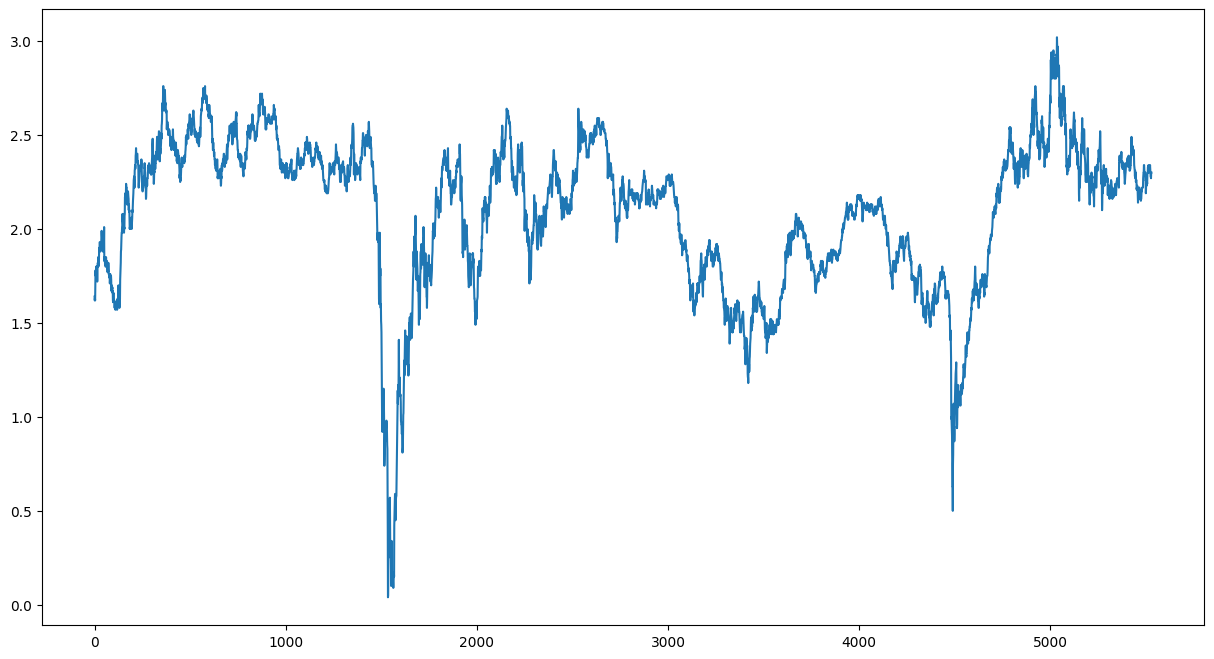

In [35]:
plt.figure(figsize=(15,8))
plt.plot(new_inflation['T10YIE'])
plt.show()

### Bugs

AEP -> FA >>> Wierd Earnings Chart<br>

BLDR -> FA >>> NAN showing up in EBITDA/EBIT chart<br> 

In [13]:
ticker = yf.Ticker('BRK')
print(ticker)

yfinance.Ticker object <BRK>


{'exchange': 'YHD',
 'quoteType': 'MUTUALFUND',
 'symbol': 'BRK',
 'underlyingSymbol': 'BRK',
 'firstTradeDateEpochUtc': 839511000,
 'timeZoneFullName': 'America/New_York',
 'timeZoneShortName': 'EDT',
 'uuid': 'ec179e4b-5a81-3f1c-9bf2-978aec1513d5',
 'gmtOffSetMilliseconds': -14400000,
 'maxAge': 86400,
 'trailingPegRatio': None}

FA >>> KeyError: 'EBITDA'<br>
FA >>> KeyError: 'TotalExpenses'<br>
GENERAL -> FA >>> Increase Horizontal width between subplots in earnings chart<br>
FA >>> Wierd Earnings Chart<br>

In [17]:
df = pd.DataFrame({'a':[1,2,3,4]})
df['b'] = df['a']**2
df

,a,b
0,1,1
1,2,4
2,3,9
3,4,16


In [8]:
SP_data = pd.read_excel("S&P500data.xlsx")
SP_data.columns = SP_data.iloc[0,:]
SP_data = SP_data.drop(index = 0)

In [9]:
display(SP_data)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters,Founded
1,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,"Santa Clara, California",1999
2,AAL,American Airlines Group,Industrials,Passenger Airlines,"Fort Worth, Texas",1934
3,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1977
4,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2013 (1888)
5,ABNB,Airbnb,Consumer Discretionary,"Hotels, Resorts & Cruise Lines","San Francisco, California",2008
...,...,...,...,...,...,...
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",1927
501,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",1969
502,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",1873


In [20]:
symbol = 'AAPL'
symbol_sector = SP_data[SP_data['Symbol'] == symbol]['GICS Sector'].item()
symbol_subsector = SP_data[SP_data['Symbol'] == symbol]['GICS Sub-Industry'].item()

competitor_data = SP_data[(SP_data['GICS Sector'] == symbol_sector) & (SP_data['GICS Sub-Industry'] == symbol_subsector)]
display(competitor_data)
tickers = list(competitor_data['Symbol'])

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters,Founded
3,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1977
226,HPE,Hewlett Packard Enterprise,Information Technology,"Technology Hardware, Storage & Peripherals","Houston, Texas",2015
227,HPQ,HP Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Palo Alto, California",1939 (2015)
341,NTAP,NetApp,Information Technology,"Technology Hardware, Storage & Peripherals","San Jose, California",1992
422,STX,Seagate Technology,Information Technology,"Technology Hardware, Storage & Peripherals","Dublin, Ireland",1979
481,WDC,Western Digital,Information Technology,"Technology Hardware, Storage & Peripherals","San Jose, California",1970


In [27]:
import plotly.graph_objects as go

stock_data = {}

# Download data for each stock
for ticker in tickers:
    stock_data[ticker] = yf.download(ticker, period='10y', interval='1d')

# Create a trace for each stock
traces = []
for ticker in tickers:
    data = stock_data[ticker]['Adj Close']
    cumulative_returns = (1 + data.pct_change()).cumprod()
    trace = go.Scatter(x=cumulative_returns.index, y=cumulative_returns.values, mode='lines', name=ticker)
    traces.append(trace)

# Create a layout
layout = go.Layout(
    title='Cumulative Stock Returns',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Cumulative Returns'),
    hovermode='closest',
    height=800
)

# Create the figure and plot
fig = go.Figure(data=traces, layout=layout)
fig.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
